<a href="https://colab.research.google.com/github/polrgn/biomedical_clustering_topic_modeling/blob/main/3_comparison_representations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Load libraries and data

In [ ]:
import numpy as np 
import pandas as pd
import pickle
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Normalizer
import scipy.sparse
from sklearn.cluster import MiniBatchKMeans
from sklearn import metrics
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import scale
from time import time
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, fowlkes_mallows_score, pairwise

Mount Google drive

In [ ]:
# Mounting Google drive where we save our data and embeddings
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


Read the data

In [ ]:
lda_view = pd.read_csv('drive/MyDrive/Projet MedML/Outputs/lda_abstract_df.csv',index_col=0).drop(['cord_uid','abstract','word_count'],axis=1)
ae_view = pd.read_csv('drive/MyDrive/Projet MedML/Outputs/ae_encoded_abstract_df_64.csv',index_col=0).drop(['cord_uid','abstract','word_count'],axis=1)
tfidf_view = scipy.sparse.load_npz('drive/MyDrive/Projet MedML/Outputs/tfidf_abstract.npz')
abstract_df = pd.read_csv('drive/MyDrive/Projet MedML/Outputs/abstract_df_clean_stopwords_lang_abstrlen.csv',index_col=0)[0:10000]
list_stop_words = np.load("drive/MyDrive/Projet MedML/Data/list_stopwords.npz")
list_stop_words = list(list_stop_words['arr_0'])

Check the shape of loaded data.

In [ ]:
print(np.shape(lda_view),np.shape(ae_view),np.shape(tfidf_view))

(10000, 10) (10000, 64) (10000, 5000)


In [ ]:
print('LDA',lda_view.iloc[0],'\n','AE-LSTM',ae_view.iloc[0],'\n','TFIDF',tfidf_view.todense()[0],'\n')

LDA 0    0.001137
1    0.001136
2    0.645228
3    0.001137
4    0.208104
5    0.029390
6    0.001137
7    0.001137
8    0.001137
9    0.110459
Name: 353391, dtype: float64 
 AE-LSTM 0    -0.025721
1     0.517121
2    -0.479899
3    -0.605407
4     0.068654
        ...   
59   -0.386709
60    0.642630
61   -0.059549
62   -0.432383
63    0.443774
Name: 353391, Length: 64, dtype: float64 
 TFIDF [[0. 0. 0. ... 0. 0. 0.]] 



In [ ]:
tfidf_view_array = np.squeeze(np.asarray(tfidf_view.todense()))
print('Sparsity TF-IDF',sum(sum(tfidf_view_array==0))/(np.shape(tfidf_view_array)[0]*np.shape(tfidf_view_array)[1]))
print('Sparsity LDA',sum(sum(np.array(lda_view==0)))/(np.shape(lda_view)[0]*np.shape(lda_view)[1]))
print('Sparsity AE',sum(sum(np.array(ae_view==0)))/(np.shape(ae_view)[0]*np.shape(ae_view)[1]))

Sparsity TF-IDF 0.98751998
Sparsity LDA 0.0
Sparsity AE 0.0002109375


#Comparing learnt features

T-SNE on each features matrix with different levels of perpelexity.

In [ ]:
def sg_tsne(X,range_perplexity):
  fig, axs = plt.subplots(1, 3,figsize=(30,10))
  i = 0
  for p in range_perplexity:
    tsne = TSNE(n_components=2, perplexity=p, verbose=1, init='random', metric='cosine', random_state=None)
    tsne_results = tsne.fit_transform(X)
    df = pd.DataFrame({"tsne-2d-one": tsne_results[:,0], "tsne-2d-two":tsne_results[:,1]})
  
    sns.scatterplot(
        x="tsne-2d-one", y="tsne-2d-two",
        palette=sns.color_palette("hls", 10),
        data=df,
        legend="full",
        alpha=0.3,
        ax = axs[i])
    i+=1
    
  plt.show()
  return(fig)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.001s...
[t-SNE] Computed neighbors for 10000 samples in 2.417s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.059721
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.162445
[t-SNE] KL divergence after 1000 iterations: 1.481206
[t-SNE] Computing 151 nea

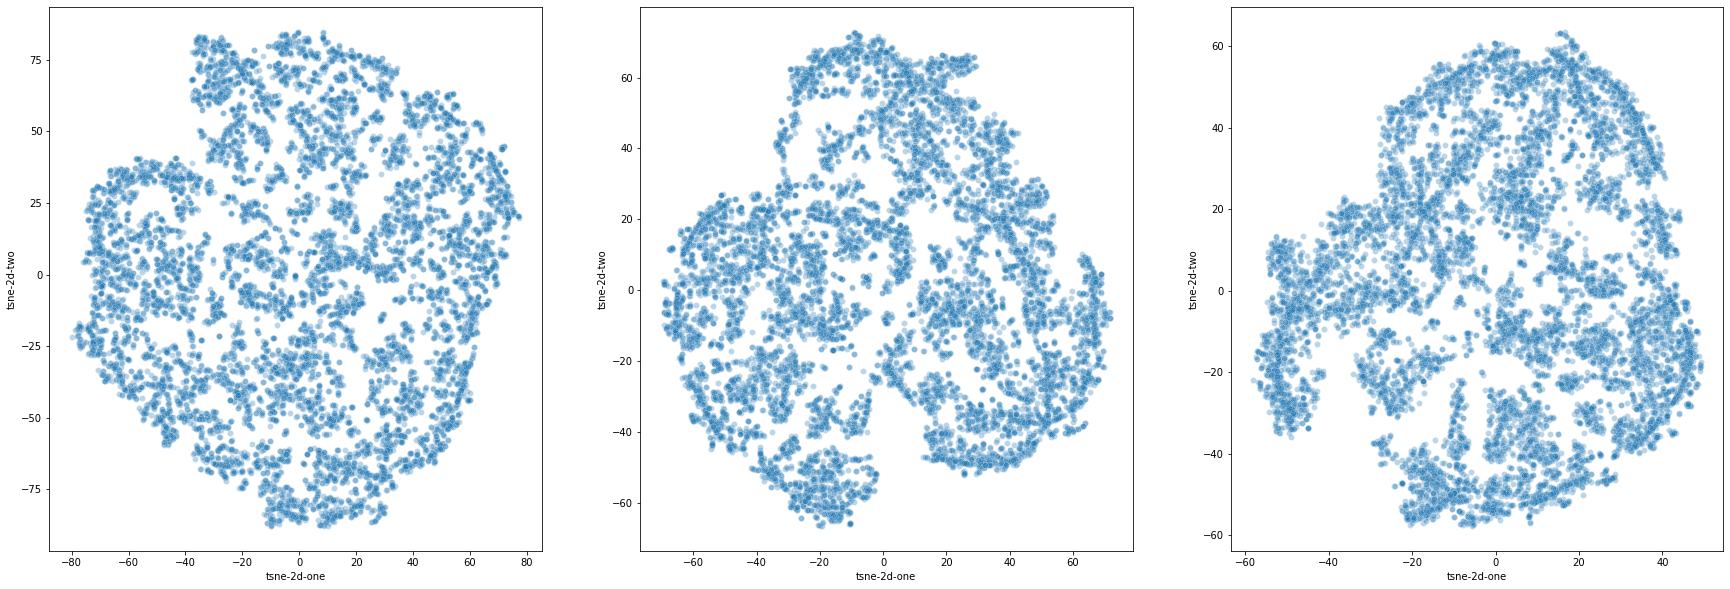

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.001s...
[t-SNE] Computed neighbors for 10000 samples in 2.262s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.059462
[t-SNE] KL divergence after 250 iterations with early exaggeration: 91.015160
[t-SNE] KL divergence after 1000 iterations: 2.323721
[t-SNE] Computing 151 nea

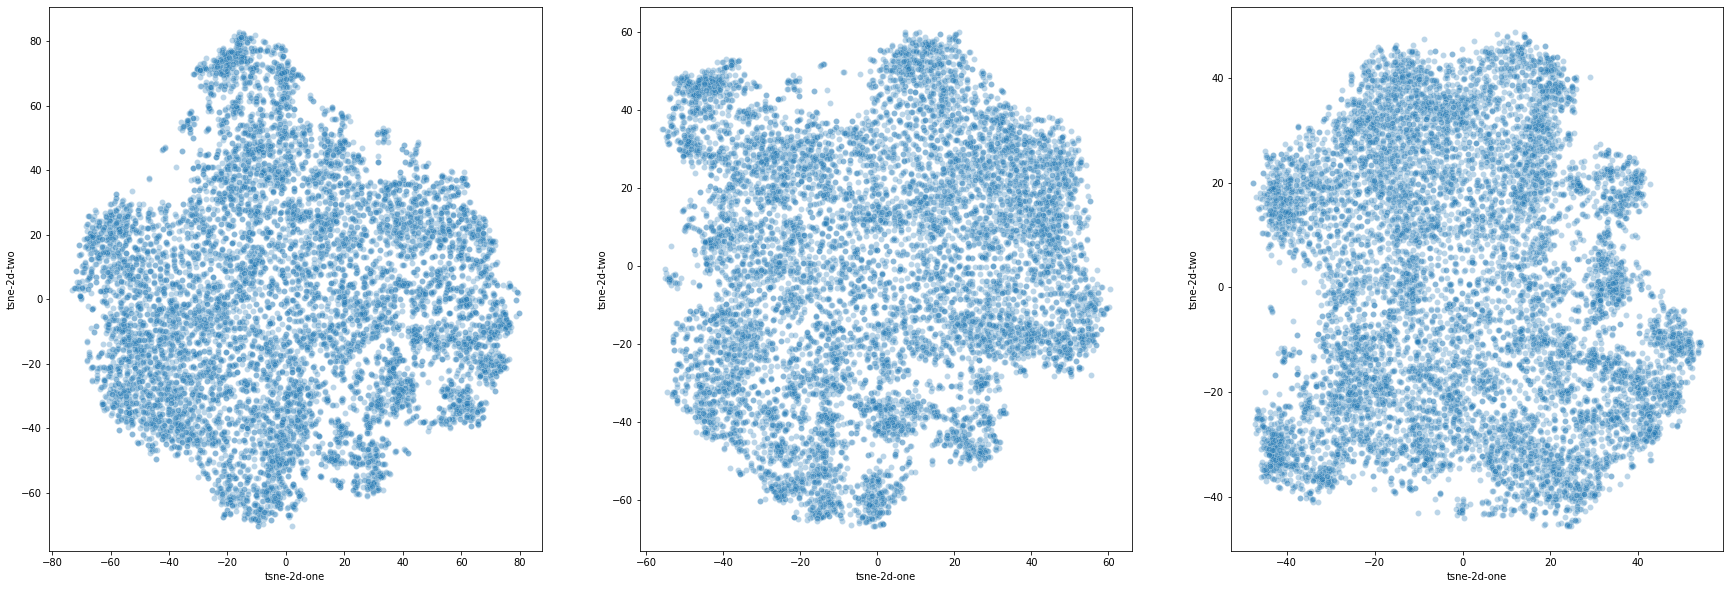

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.005s...
[t-SNE] Computed neighbors for 10000 samples in 4.811s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.210883
[t-SNE] KL divergence after 50 iterations with early exaggeration: 97.258270
[t-SNE] KL divergence after 1000 iterations: 2.603606
[t-SNE] Computing 151 near

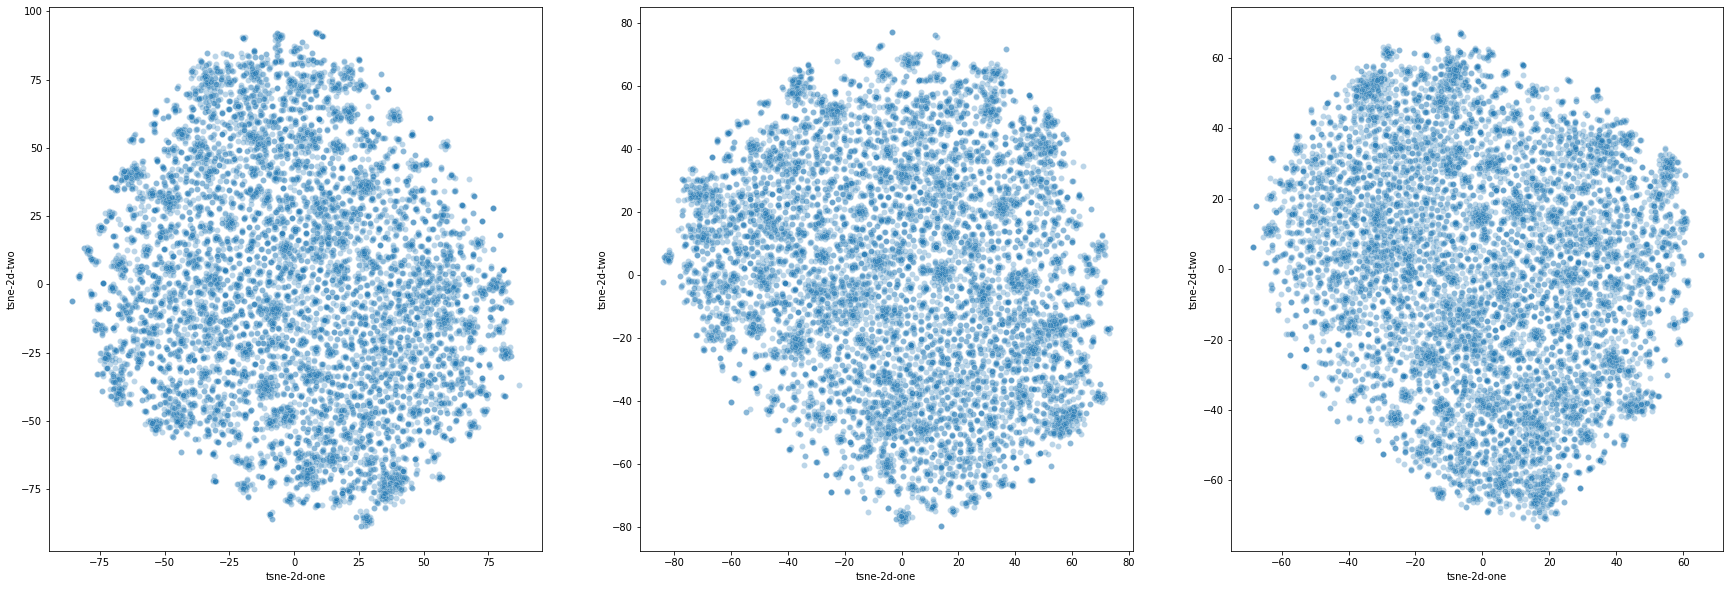

In [ ]:
range_p = [30,50,80]
sg_tsne(lda_view,range_p).savefig("drive/MyDrive/Projet MedML/Images/tsne_lda_view_nmed.png")
sg_tsne(ae_view,range_p).savefig("drive/MyDrive/Projet MedML/Images/tsne_ae_view_nmed.png")
sg_tsne(tfidf_view,range_p).savefig("drive/MyDrive/Projet MedML/Images/tsne_tfidf_view_nmed.png")

# Clustering on each features matrix separately

We use K-means for its scalability and implementation of mini-batch k-means. Our datasets are big.

In [ ]:
def sv_clustering(X,range_k):
  silhouette = []
  ch = []
  db = []
  for k in range_k:
    km = MiniBatchKMeans(n_clusters=k, init='k-means++', n_init=10,
                         init_size=1000, batch_size=1000)
    cluster_labels = km.fit_predict(X)
    silhouette.append(metrics.silhouette_score(X, cluster_labels))
    ch.append(metrics.calinski_harabasz_score(X, cluster_labels))
    db.append(metrics.davies_bouldin_score(X, cluster_labels))

  results = pd.DataFrame({'n_cluster':range_k,'silhouette':silhouette,
                          'CH_score':ch, 'DB_score':db})
  print(results)
  return(results)


Compute performance metrics on clustering. Given our completely unsupervised setting, we use metrics that do not require ground truth labels: Silhouette, Calinski Harabasz, Davies Bouldin

In [ ]:
range_n_clusters = [5,6,7,8,10,20,30]
sv_clustering(lda_view,range_n_clusters).to_csv('drive/MyDrive/Projet MedML/Outputs/sv_clustering_lda_nmed.csv')
sv_clustering(ae_view,range_n_clusters).to_csv('drive/MyDrive/Projet MedML/Outputs/sv_clustering_ae_nmed.csv')
sv_clustering(tfidf_view_array,range_n_clusters).to_csv('drive/MyDrive/Projet MedML/Outputs/sv_clustering_tfidf_nmed.csv')

   n_cluster  silhouette     CH_score  DB_score
0          5    0.316457  3529.836641  1.288790
1          6    0.318188  3418.245249  1.436085
2          7    0.286778  3069.632031  1.588560
3          8    0.294149  2890.399568  1.553641
4         10    0.280637  2708.516007  1.454003
5         20    0.224934  2032.204108  1.533618
6         30    0.207311  1676.849708  1.471353
   n_cluster  silhouette     CH_score  DB_score
0          5    0.117999  1095.514564  2.357305
1          6    0.111420   971.918336  2.415908
2          7    0.088653   879.839477  2.525402
3          8    0.120351   825.427832  2.319176
4         10    0.089436   728.145022  2.324343
5         20    0.086366   485.495241  2.288287
6         30    0.070776   368.943361  2.425939
   n_cluster  silhouette   CH_score   DB_score
0          5    0.004124  30.326770  12.984981
1          6    0.004431  28.183527  11.918891
2          7    0.004182  26.263020  11.768683
3          8    0.004689  25.694850  11.6863

We compute compatibility scores between the single view clusterings: adjusted Rand score and adjusted normalized mutual information. Fowlkes-Mallows score were computed but eventually not used and reported because the metric is not suited to compare clusterings.

In [ ]:
abstract_df_clusterized = pd.read_csv('drive/MyDrive/Projet MedML/Outputs/abstracts_clusterized.csv',index_col=0)

In [ ]:
rand_score =[]
rand_score.append(adjusted_rand_score(abstract_df_clusterized['cluster_lda'],abstract_df_clusterized ['cluster_ae']))
rand_score.append(adjusted_rand_score(abstract_df_clusterized['cluster_lda'],abstract_df_clusterized ['cluster_tfidf']))
rand_score.append(adjusted_rand_score(abstract_df_clusterized['cluster_tfidf'],abstract_df_clusterized ['cluster_ae']))

nmi_score =[]
nmi_score.append(adjusted_mutual_info_score(abstract_df_clusterized['cluster_lda'],abstract_df_clusterized ['cluster_ae']))
nmi_score.append(adjusted_mutual_info_score(abstract_df_clusterized['cluster_lda'],abstract_df_clusterized ['cluster_tfidf']))
nmi_score.append(adjusted_mutual_info_score(abstract_df_clusterized['cluster_tfidf'],abstract_df_clusterized ['cluster_ae']))

fm_score =[]
fm_score.append(fowlkes_mallows_score(abstract_df_clusterized['cluster_lda'],abstract_df_clusterized ['cluster_ae']))
fm_score.append(fowlkes_mallows_score(abstract_df_clusterized['cluster_lda'],abstract_df_clusterized ['cluster_tfidf']))
fm_score.append(fowlkes_mallows_score(abstract_df_clusterized['cluster_tfidf'],abstract_df_clusterized ['cluster_ae']))

clust_compare = pd.DataFrame({'pairwise comparison': ['lda-ae','lda-tfidf','tfidf-ae'],
                              'Adj. Rand': rand_score,
                              'Adj. NMI': nmi_score,
                              'Fowlkes Mallows': fm_score})

print(clust_compare)
clust_compare.to_csv('drive/MyDrive/Projet MedML/Outputs/compare_singleview_clusterings.csv')

  pairwise comparison  Adj. Rand  Adj. NMI  Fowlkes Mallows
0              lda-ae   0.344776  0.425547         0.440374
1           lda-tfidf   0.267103  0.364457         0.385120
2            tfidf-ae   0.302984  0.354907         0.417273


# Top keywords per cluster

We try different functions to extract top words per cluster. The score of each token is computed in different ways:


*   get_topwords: terms frequency over all the documents in the cluster joined in a single big document.
*   get_topwords2: column wise mean of the TF-IDF matrix computed on the documents in the cluster.
*   get_topwords3: terms frequency over all the documents in the cluster joined in a single big document * inverse document frequency computed on the documents in the cluster.
*   get_topwords_bycluster2: select largest ranking work given column wise mean of the TF-IDF matrix computed on the entire corpus.

All the functions give similar results in terms of interpreted labels. We select get_topwords_bycluster2 because it is the most intuitive, and matches clas-TF-IDF proposed in litterature.


In [ ]:
def get_topwords(data,k):
    vectorizer = TfidfVectorizer(ngram_range=(1,1), max_features = 5000, max_df = 2, min_df = 1, stop_words=list_stop_words)
    tfidf = vectorizer.fit_transform([' '.join(data.to_list())])
    voc_df = pd.DataFrame(vectorizer.vocabulary_.items())
    voc_df.columns=['token','index']
    voc_df = voc_df.sort_values(by='index')
    tdif_df = pd.DataFrame({'token':voc_df['token'], 'tfidf': np.array(tfidf.todense()).flatten()})
    tdif_df = tdif_df.sort_values(by='tfidf', ascending=False)
    return tdif_df.head(k)

def get_topwords2(data,k):
    vectorizer = TfidfVectorizer(ngram_range=(1,1), max_features = 5000, max_df = 0.3, min_df = 0.0001, stop_words=list_stop_words)
    tfidf = vectorizer.fit_transform(data).mean(axis=0)
    voc_df = pd.DataFrame(vectorizer.vocabulary_.items())
    voc_df.columns=['token','index']
    voc_df = voc_df.sort_values(by='index')
    tdif_df = pd.DataFrame({'token':voc_df['token'], 'tfidf': np.array(tfidf).flatten()})
    tdif_df = tdif_df.sort_values(by='tfidf', ascending=False)
    return tdif_df.head(k)

def get_topwords3(data,k):
    countvectorizer = CountVectorizer(ngram_range=(1,2), max_features = 5000, max_df = 0.4, stop_words=list_stop_words)
    data_vectorized = countvectorizer.fit_transform(data)
    word_df = pd.DataFrame({'word': countvectorizer.get_feature_names(), 'count': np.asarray(data_vectorized.sum(axis=0))[0]})
    tfidfvectorizer = TfidfVectorizer(ngram_range=(1,1),vocabulary= countvectorizer.vocabulary_)
    word_df['idf'] = list(tfidfvectorizer.fit(data).idf_.flatten())
    word_df['custom_index'] = scale(word_df['count']*word_df['idf'])
    word_df = word_df.sort_values(by='custom_index', ascending=False)
    return word_df.head(k)

def get_topwords_bycluster(df,cluster_var,n_clust,n_topword,function):
  topwords_glob = pd.DataFrame()
  for i in range(0,n_clust):
        data = df[df[cluster_var]==i]['abstract']
        print('cluster',i)
        #print(get_topwords(data,15),'\n')
        #print(get_topwords2(data,15),'\n')
        topword_clust = function(data,n_topword)
        print(topword_clust[['word','custom_index']],'\n')
        topword_clust['cluster'] = str(i)
        topwords_glob = pd.concat([topwords_glob,topword_clust[['cluster','word','custom_index']]],axis=0)
  return topwords_glob

def get_topwords_bycluster2(df,cluster_var,n_clust,n_topword):
    topwords_glob = pd.DataFrame()
    topwords_glob_dense = np.zeros(shape=(n_clust,2))
    cluster_vec = []
    topwords_vec = []
    with open(r"drive/MyDrive/Projet MedML/Outputs/tfidf_vectorizer.pickle", "rb") as input_file:
        tfidfvectorizer = pickle.load(input_file)
    voc_df = pd.DataFrame(tfidfvectorizer.vocabulary_.items())
    voc_df.columns=['token','index']
    voc_df = voc_df.sort_values(by='index')
    tfidf_view_df = pd.DataFrame(tfidf_view_array)
    tfidf_view_df.columns = voc_df['token']
    df.reset_index(drop = True, inplace = True)

    for i in range(0,n_clust):
        print('cluster',i)
        topword_clust = pd.DataFrame({'custom_index':np.sum(tfidf_view_df[df[cluster_var]==i],axis=0).sort_values(ascending=False)[0:n_topword]})
        topword_clust.reset_index(inplace=True)
        topword_clust.rename(columns={'token':'word'}, inplace=True)
        print(topword_clust[['word','custom_index']],'\n')
        topword_clust['cluster'] = str(i)
        topwords_glob = pd.concat([topwords_glob,topword_clust[['cluster','word','custom_index']]],axis=0)
        cluster_vec.append(i)
        topwords_vec.append(", ".join(topword_clust['word']))
    topwords_glob_dense = pd.DataFrame({'cluster':cluster_vec,'top_words':topwords_vec})
    return topwords_glob, topwords_glob_dense

We run the clustering with K=8 clusters and extract top words.

In [ ]:
abstract_df = pd.read_csv('drive/MyDrive/Projet MedML/Outputs/abstract_df_clean_stopwords_lang_abstrlen.csv',index_col=0)[0:10000]
abstract_df_clusterized = abstract_df

In [ ]:
k = 8
X = ae_view
km = MiniBatchKMeans(n_clusters=k, init='k-means++', n_init=10,
                     init_size=1000, batch_size=1000)
cluster_labels = km.fit_predict(X)
abstract_df_clusterized['cluster_ae'] = cluster_labels
res, res_dense = get_topwords_bycluster2(abstract_df_clusterized,'cluster_ae',k,20)
res.to_csv('drive/MyDrive/Projet MedML/Outputs/topword_clust_ae.csv')
res_dense.to_csv('drive/MyDrive/Projet MedML/Outputs/topword_clust_ae_dense.csv')


X = tfidf_view
km = MiniBatchKMeans(n_clusters=k, init='k-means++', n_init=10,
                     init_size=1000, batch_size=1000)
cluster_labels = km.fit_predict(X)
abstract_df_clusterized['cluster_tfidf'] = cluster_labels
res, res_dense = get_topwords_bycluster2(abstract_df_clusterized,'cluster_tfidf',k,20)
res.to_csv('drive/MyDrive/Projet MedML/Outputs/topword_clust_tfidf.csv')
res_dense.to_csv('drive/MyDrive/Projet MedML/Outputs/topword_clust_tfidf_dense.csv')

X = lda_view
km = MiniBatchKMeans(n_clusters=k, init='k-means++', n_init=10,
                     init_size=1000, batch_size=1000)
cluster_labels = km.fit_predict(X)
abstract_df_clusterized['cluster_lda'] = cluster_labels
abstract_df_clusterized.to_csv('drive/MyDrive/Projet MedML/Outputs/abstracts_clusterized.csv')

cluster 0
            word  custom_index
0     infections     37.972640
1       syndrome     37.132251
2        viruses     35.119820
3   transmission     32.464056
4      influenza     30.294329
5       diseases     30.133423
6     infectious     27.819913
7           case     26.535374
8       children     24.355018
9       infected     24.341905
10        immune     23.786189
11        review     23.776224
12         china     23.698649
13      symptoms     23.563843
14        spread     22.581579
15      reported     22.403537
16       vaccine     22.392515
17        caused     22.325097
18         world     20.732609
19     potential     20.644260 

cluster 1
             word  custom_index
0        students     40.490503
1         anxiety     38.175288
2    participants     36.009335
3          mental     35.631272
4          survey     35.042552
5          online     29.545859
6         medical     29.435734
7   psychological     28.424857
8          social     27.702736
9      